In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


In [2]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

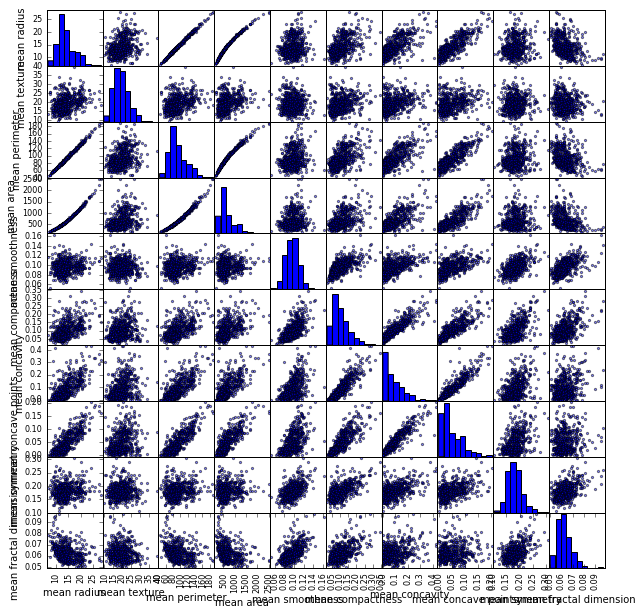

In [7]:
df = pd.DataFrame(data.data[:, 0:10], 
                  columns=data.feature_names[0:10])
scatter_matrix(df, figsize=(10,10));

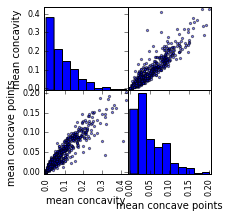

In [8]:
df = pd.DataFrame(data.data[:, 6:8],
                  columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3));

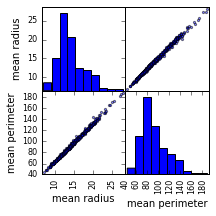

In [9]:
df = pd.DataFrame(data.data[:, [0,2]],
                  columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3,3));

In [10]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [11]:
X.shape, y.shape

((569, 2), (569,))

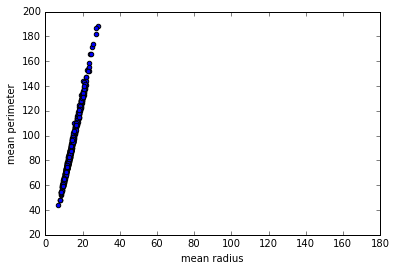

In [12]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
X_new = pca.transform(X)

(-60, 120)

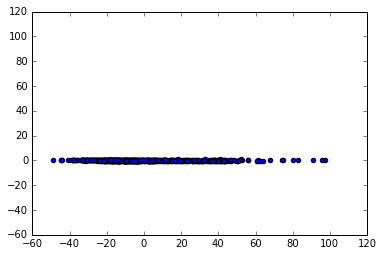

In [17]:
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

In [18]:
pca.explained_variance_

array([  6.01747863e+02,   5.20297651e-02])

In [19]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([  9.99913543e-01,   8.64569199e-05])

In [20]:
pca.explained_variance_ratio_

array([  9.99913543e-01,   8.64569199e-05])

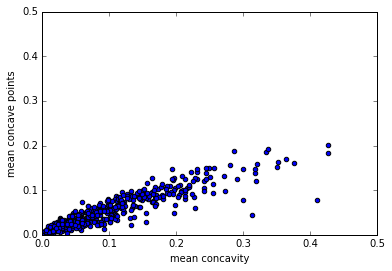

In [21]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.ylabel(names[1])

(-0.25, 0.25)

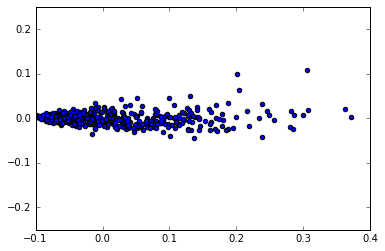

In [22]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [23]:
pca.explained_variance_

array([ 0.00765906,  0.00018804])

In [24]:
pca.explained_variance_ratio_ # 寄与率

array([ 0.97603731,  0.02396269])

In [25]:
# eigで検算
m = X.mean(axis=0)

In [26]:
Xp = (X - m)

In [27]:
C = Xp.transpose().dot(Xp)

In [28]:
w, _ = np.linalg.eig(C)

In [29]:
w

array([ 4.3580028 ,  0.10699332])

In [30]:
w / w.sum() # 寄与率

array([ 0.97603731,  0.02396269])

In [31]:
# data全体でやる

X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [32]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

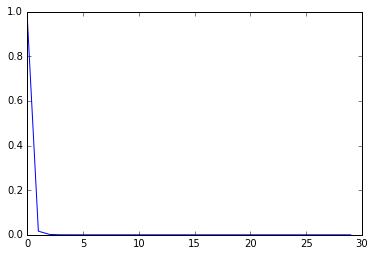

In [33]:
plt.plot(pca.explained_variance_ratio_)

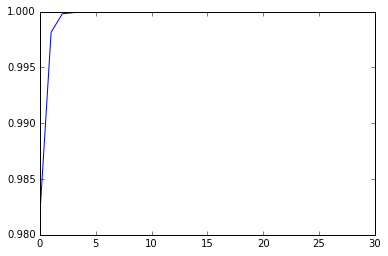

In [34]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [35]:
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

In [36]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [37]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.94736842105263153

In [38]:
clf.fit(X_train_pca[:, 0:1], y_train)
clf.score(X_test_pca[:, 0:1], y_test)

0.92105263157894735

In [39]:
clf.fit(X_train_pca[:, 0:3], y_train)
clf.score(X_test_pca[:, 0:3], y_test)

0.94736842105263153

In [40]:
scores = []
i_range = range(1,31)

for i in i_range:

    clf.fit(X_train_pca[:, 0:i], y_train)
    scores.append( clf.score(X_test_pca[:, 0:i],
                             y_test) )
    
scores = np.array(scores)

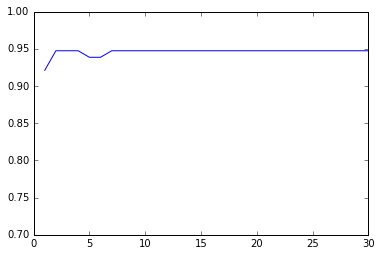

In [41]:
plt.plot(i_range, scores)
plt.ylim(0.7,1);

In [42]:
clf.fit(X_train_pca[:, 0:2], y_train)
clf.score(X_test_pca[:, 0:2], y_test)

0.94736842105263153

In [43]:
from sklearn.preprocessing import PolynomialFeatures

degree 1: $x_1, x_2, x_3$

degree 2: $x_1 x_2, x_1 x_3, x_2 x_3$

degree 3: $x_1 x_2 x_3$

degree 1: $x_1, x_2, x_3, x_4$

degree 2: $x_1 x_2, x_1 x_3, x_1 x_4, x_2 x_3, x_2 x_4, x_3 x_4$

degree 3: $x_1 x_2 x_3, x_1 x_2 x_4, x_1 x_3 x_4, x_2 x_3 x_4$

degree 4: $x_1 x_2 x_3 x_4$

In [51]:
polf = PolynomialFeatures(degree=2)

In [52]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [53]:
X_train_poly = polf.transform(X_train)
X_test_poly  = polf.transform(X_test)

In [54]:
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

In [55]:
X_test.shape, X_test_poly.shape

((114, 30), (114, 496))

In [56]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.95614035087719296

In [57]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [58]:
pca.fit(X_train_poly)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

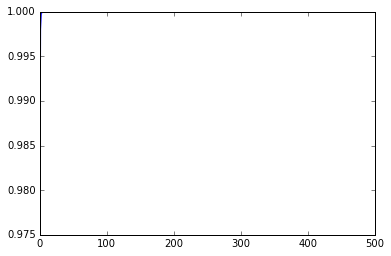

In [59]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [60]:
scores = []

n_features = X_train_poly.shape[1]
i_range = range(1, n_features, 10)

X_train_poly_pca = pca.transform(X_train_poly)
X_test_poly_pca  = pca.transform(X_test_poly)

for i in i_range:

    clf.fit(X_train_poly_pca[:, 0:i], y_train)
    
    scores.append( clf.score(X_test_poly_pca[:, 0:i],
                             y_test) )

scores = np.array(scores)

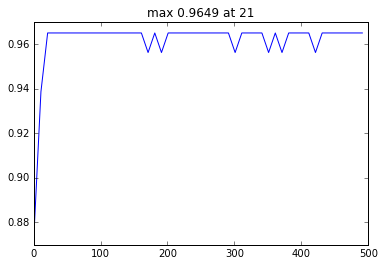

In [61]:
plt.plot(i_range, scores);
plt.title("max {0:.4f} at {1}".format(scores.max(), 
                                      i_range[np.argmax(scores)]))

d= 2
max dimension:  496
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
d= 3
max dimension:  5456
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,
d= 4
max dimension:  46376
i=1,11,21,31,41,51,61,71,81,91,101,111,121,131,141,151,161,171,181,191,201,211,221,231,241,251,261,271,281,291,301,311,321,331,341,351,361,371,381,391,401,411,421,431,441,451,461,471,481,491,


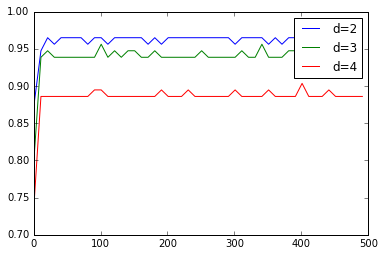

In [62]:
for d in [2, 3, 4]:
    print("d=", d)
    
    polf = PolynomialFeatures(degree=d)
    polf.fit(X_train)
    X_train_poly = polf.transform(X_train)
    X_test_poly  = polf.transform(X_test)

    pca.fit(X_train_poly)
    X_train_poly_pca = pca.transform(X_train_poly)
    X_test_poly_pca  = pca.transform(X_test_poly)
    
    scores = []
    n_features = min(500, X_train_poly.shape[1])
    i_range = range(1, n_features, 10)
    
    print("max dimension: ", X_train_poly.shape[1])

    print("i=", end="")
    for i in i_range:
        print(i, end=",")
        clf.fit(X_train_poly_pca[:, 0:i], y_train)
        scores.append( clf.score(X_test_poly_pca[:, 0:i], y_test) )
    print("")
    
    scores = np.array(scores)
    plt.plot(i_range, scores, label="d={0}".format(d))

plt.legend();